<a href="https://colab.research.google.com/github/ihamzak/books-genre-classification/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, run the code cell below for a nicer layout.

In [0]:
%%html
<style>
h1 { margin-top: 3em !important; }
h2 { margin-top: 2em !important; }
#notebook-container { 
    width: 50% !important; 
    min-width: 800px;
}
</style>

<h1>Book classifications with kNN</h1>


There is a related task in data analysis: the <i>classification</i> of data according using an already existing dataset. The <i>classes</i> in our dataset are the six genres (fantasy, sci-fi, comics, horror, romance, history) and the <i>features</i> are the ratings. The classification task in our case can be summarized as follows:

> Given a rating pair (`old`,`young`) of a book that is not in our database, decide a genre classification using the existing dataset.

Again, the notion of a <i>distance</i> or <i>metric</i> is the key to solve this task: the idea is that we can deduce the genre of a book by looking at books that have similar (close) ratings. Let us call the
book whose genre we want to determine the <i>query</i>. A $k$NN-classifier finds the $k$ points closest of the query and decides the label (genre) of the query depending on the labels (genres) it sees among those $k$ entries of our dataset. The simplest decision algorithm here is a <b>majority vote</b>: we assign the genre that appears the most time among those $k$ neighbours.

The task in the notebook is to implement this kind of classifier!

Let's load the dataset first:

In [0]:
from google.colab import drive 

drive.mount('/content/drive')


Mounted at /content/drive


In [0]:

import pandas as pd 
books = pd.read_csv('/content/drive/My Drive/02-resources/books.csv')
books.head()

,Unnamed: 0,author,title,genre,isbn,old,young
0,0,Aaron Stephens,The secret of the azure orcs,fantasy,0-560-22625-X,35,40
1,1,Laura Lambert,War of the crimson comets,sci-fi,0-477-61096-X,6,43
2,2,Jessica Johnson,The amazing Bug-Man,comics,1-82415-269-8,5,88
3,3,Keith Jones,The poltergeist will come back,horror,0-212-12934-1,26,22
4,4,Megan Jones,October roses,romance,1-397-92386-5,62,51


We will again use the Euclidean distance between book ratings. 

In [0]:
# Put your implementation of `rating_dist` here and run the cell
import math
def  rating_dist(ratingA,ratingB):
  dist =  0
  for i,j in zip(ratingA,ratingB):
    dist += pow((j-i),2)
  return  math.sqrt(dist)

Let us first implement a few useful methods to work with the `books` dataset. For simplicity we reference `books` as a global variable and do not pass it as a parameter to the function.

> Implement a method `find_genres(...)` that takes a list of indices and
returns the genres of each index in a list.

Your implementation should pass the tests in the subsequent cell.

In [0]:
books.loc[1][['old','young']]

old       6
young    43
Name: 1, dtype: object

In [0]:
def find_genres(indices):
    """ Return the genres of the books corresponding to the
    indices in the `books` database. """
    return  list(books.genre.loc[indices])


In [0]:
assert find_genres([0,1,2]) == ['fantasy', 'sci-fi', 'comics']
assert find_genres([42,144,50]) == ['history', 'romance', 'comics']
''.join([chr(ord(s)-1) for s in 'Fwfszuijoh(t!gjof'])

"Everything's fine"

As a first step, we implement a function that returns the $k$ nearest neighbours to a given query. This is similar to what you implemented in Task 5 of `02-functions.ipynb`, however, the query is a whole row of `books` (not just the rating). You should first figure out how to extract the ratings from the row.

> Implement the method `neighbours(...)` in the cell below. The exact functionality is described in the comment.

In [0]:
def neighbours(rating, k):
    """
        Returns the k nearest neighbours of the query `rating` as
        a list of tupels (dist, i) where i is the index of the 
        corresponding row in `books` and dist is the computed distance
        to the query.
        The list is sorted by the first entry of the tuple 
        (from near to far).
    """
    dic = []
    for i in books.index:
      #dic[i] = rating_dist(rating,books.iloc[i][['old','young']])
      s= (rating_dist(rating,books.iloc[i][['old','young']]),i)
      dic.append(s)
    
    #sortedDic=  sorted(dic.items(),key= lambda x:x[1])
    #return sortedDic[:k]
    d= sorted(dic)
    return d[:k]
    
      
neighbours((30,30),5)  



[(1.0, 241),
 (1.4142135623730951, 186),
 (2.0, 334),
 (2.23606797749979, 58),
 (2.23606797749979, 170)]

In [0]:
res = neighbours(books.loc[1][['old','young']], 10)
assert find_genres([i for _,i in res]) == ['sci-fi']*10

res = neighbours((30,30), 5)
assert find_genres([i for _,i in res]) == ['fantasy', 'fantasy', 'sci-fi', 'fantasy', 'horror']

In [0]:
set(books.loc[1][['old','young']]), set(books.loc[1][['old','young']])

({6, 43}, {6, 43})

Now can put the pieces together: for a given query, we can compute the $k$ nearest neighbours and compute return the genre that appears the most among those neighbours.

> Implement the function `classify_majority` according to the specification in the comment below.

In [0]:
from collections import Counter

def classify_majority(query, k):
    """
        Returns the majority genre among the k nearest neighbours
        of `query`. The parameter `query` contains the `old` rating
        in the first coordinate `query[0]` and the `young` rating
        in the second coordinate `query[1]`.
    """
    genres=[]
    l=neighbours(query,k)
    for i,j in enumerate(l):
      genres.append(books.loc[l[i][1]]['genre'])
    c= Counter(genres).most_common(1)[0][0]

    return c
    #pass
classify_majority((30,30),5)

'fantasy'

If you completed the implementation of `classify_majority`, the next cell will output a coloured plot of the books (small plus-shaped markers) alongside a set of queries (big round markers) as classified by your implementation. Try changing the queries
and the value of `k` and see how the plot changes.

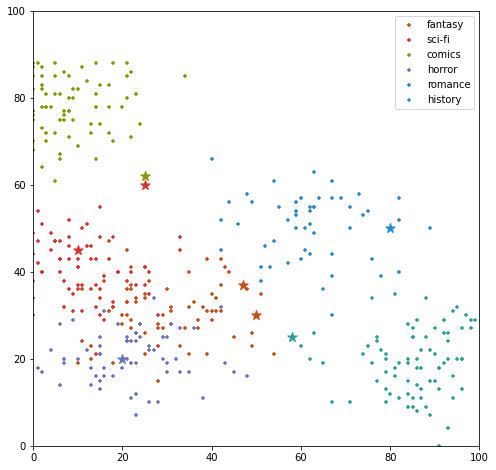

In [0]:
import matplotlib.pyplot as plt

queries = [(20,20), (50,30), (25,60), (25,62), (58,25), (80, 50),(10,45),(47,37)]
k = 2

fig, ax = plt.subplots(figsize=(8,8))

genres = list(books['genre'].unique())
colors = "#cb4b16;#dc322f;#859900;#6c71c4;#268bd2;#2aa198;".split(';')
colmap = dict(zip(genres, colors))
for genre, col in colmap.items():
    sub = books[books['genre'] == genre]
    ax.scatter(sub['old'], sub['young'], label=genre, marker='+', color=col, s=20)
    
for q in queries:
    genre = classify_majority(q, k)
    ax.scatter([q[0]], [q[1]], color=colmap[genre], marker='*', s=100)
    
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.legend()
plt.show()